# K-Means Clustering

#Analyze seed data and perform wheat variety segmentation.

### https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci ###


## Introduction
Geometrical features of kernels from three distinct wheat types were measured. All seven real-valued properties were created using a soft X-ray approach and the GRAINS package.

##Statement of the Problem:
The examined group included kernels from three different wheat varieties: Kama, Rosa, and Canadian, each with 70 elements chosen at random for the experiment. A soft X-ray approach was used to identify high-quality visualization of the interior kernel structure. It is non-destructive and significantly less expensive than more advanced imaging techniques such as scanning microscopy or laser technology. The photos were captured using KODAK 13x18 cm X-ray plates. Utilizing wheat grain from experimental fields studied at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, studies were carried out using combine harvested wheat grain. To cluster the wheat varieties, use a supervised model.

The dataset consists of seven geometric parameters of wheat kernels and their associated varieties.

1. area A
2. perimeter P
3. compactness C = 4*pi*A/P^2
4. length of kernel
5. width of kernel
6. asymmetry coefficient
7. length of kernel groove
8. variety of wheat




## Step 1: Loading the data and fundamental peripherals

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset
df_seeds = pd.read_csv('seeds.csv')


df_seeds

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
# Modify the type so that it is easy to compare the expected cluster numbers later on.
df_seeds['Type'] = df_seeds['Type'] - 1


## Step 2: *EDA* - Exploratory Data Analysis - data cleaning and exploration
### a. Data cleaning.



In [4]:
# We don't have any incomplete data
df_seeds.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [5]:
# Find out the shape the dataset
# There are 199 rows with 8 columns
df_seeds.shape

(199, 8)

### b. Data vizualisation
We have dataset with all numeric and continuous features.

In [6]:
# Take a look at the data
df_seeds.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [7]:
# Thoroughly examine the numerical features
df_seeds.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,0.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,0.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,1.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,2.000000


In [8]:
# Check the categorical variables
df_seeds.select_dtypes('object').nunique()

Series([], dtype: float64)

In [9]:
import seaborn as sns

sns.set()

# Remove the spines
sns.despine() #imported second time

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


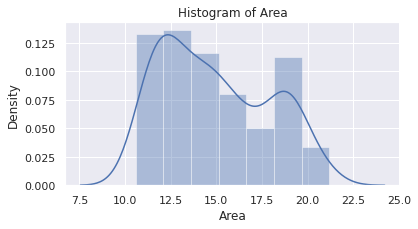

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


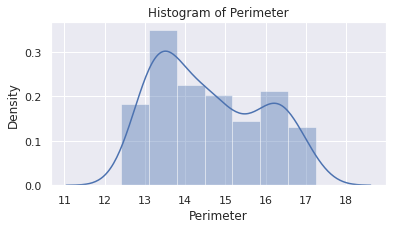

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


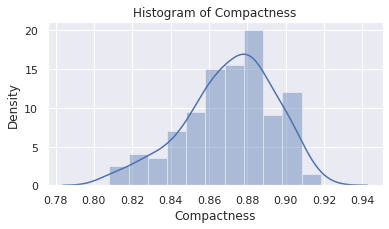

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


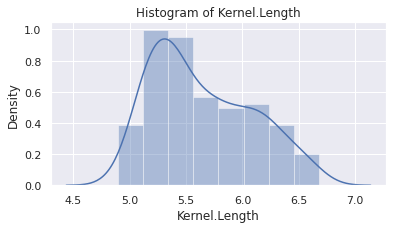

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


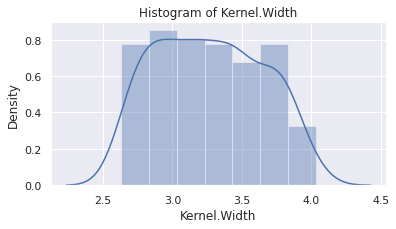

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


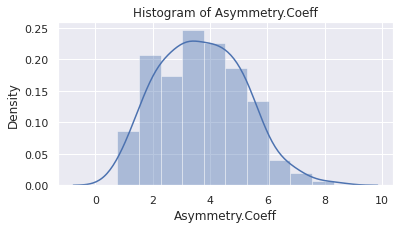

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


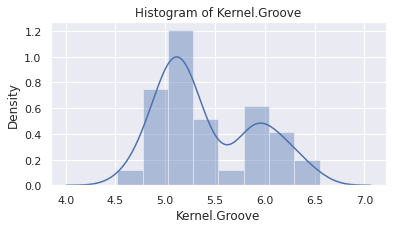

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


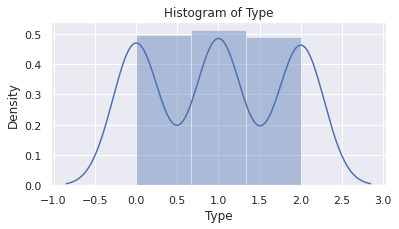

In [10]:
import seaborn as sns #imported third time

for a in df_seeds:
    ax = plt.subplots(figsize=(6, 3))
    ax = sns.distplot(df_seeds[a])
    title = "Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

The distribution of area, perimeter, kernel length, kernel width, compactness, and kernel grove length may be seen in the figures above. Viewing the histograms can visually reveal aspects such as the mean or skew. The distribution of kernel length, for example, suggests that the mean yearly income has a left skew of roughly 5.0-5.5 USD.

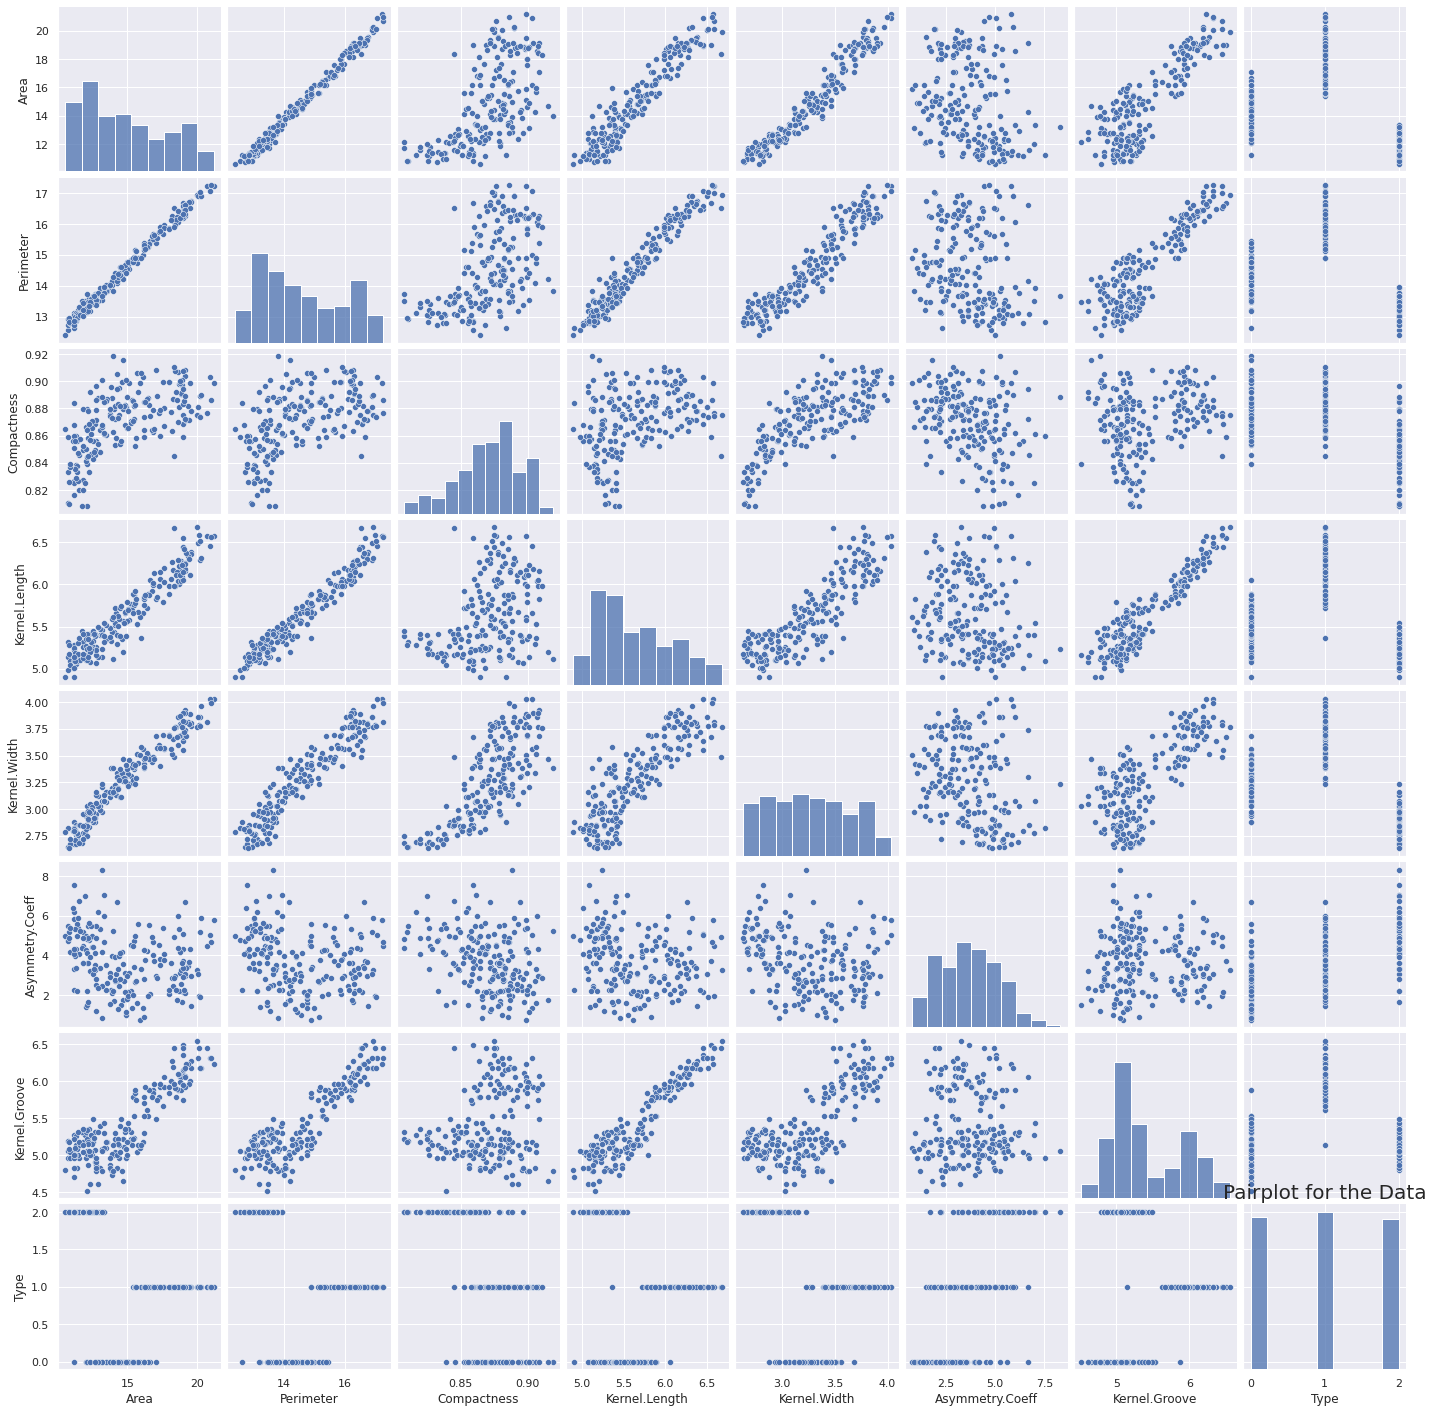

In [11]:
sns.pairplot(df_seeds)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

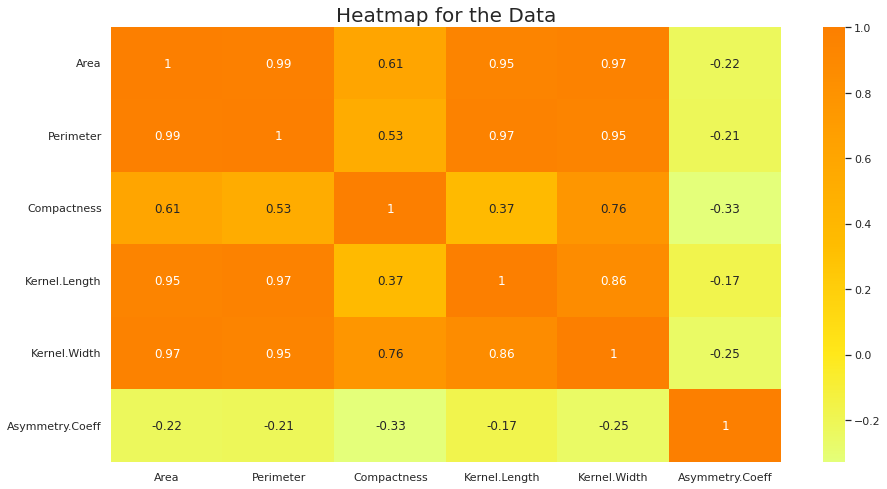

In [12]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_seeds.iloc[:, range(6)].corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

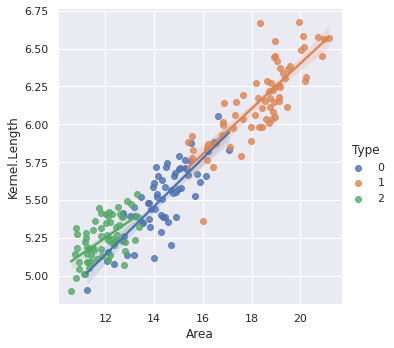

In [13]:
sns.lmplot(x="Area",y="Kernel.Length",data=df_seeds,hue="Type")

The accompanying figure clearly shows the separable boundaries between kernel variants depending on area and kernel length.
The Canadian variety has the smallest area and the shortest kernel length, whereas Rosa has the largest area and the longest kernel length.

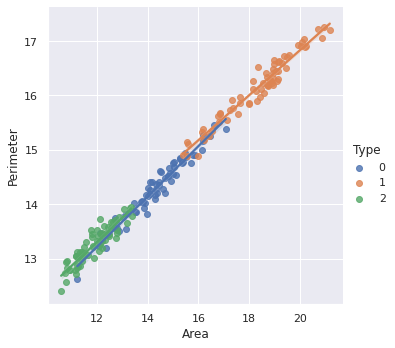

In [14]:
sns.lmplot(x="Area",y="Perimeter",data=df_seeds,hue="Type")

Area against perimeter plot again depicts the same and also suggest strong correlation between area and perimeter.

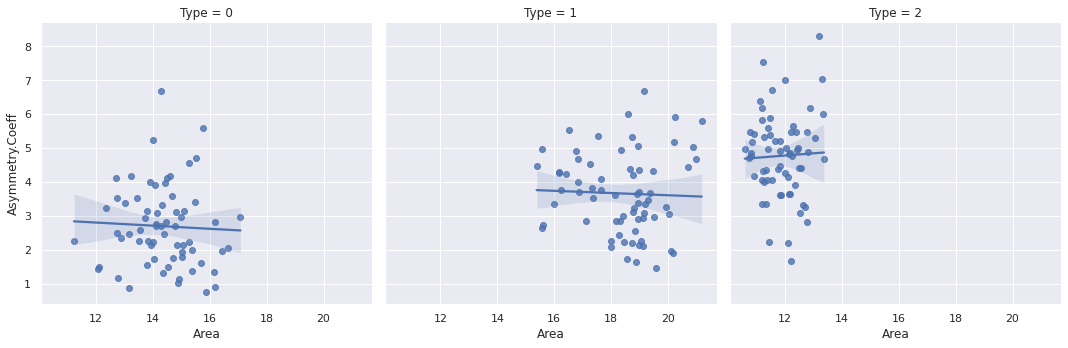

In [15]:
sns.lmplot(x="Area",y="Asymmetry.Coeff",data=df_seeds,col="Type")

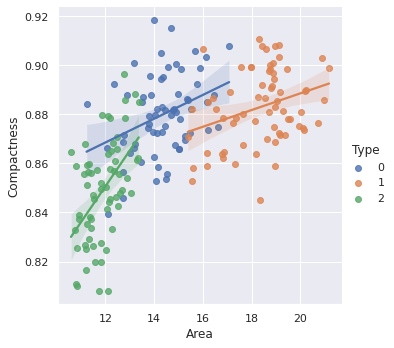

In [16]:
sns.lmplot(x="Area",y="Compactness",data=df_seeds,hue="Type")

This graphic shows the linear relationship between compactness and area for all three kinds of wheat seeds.

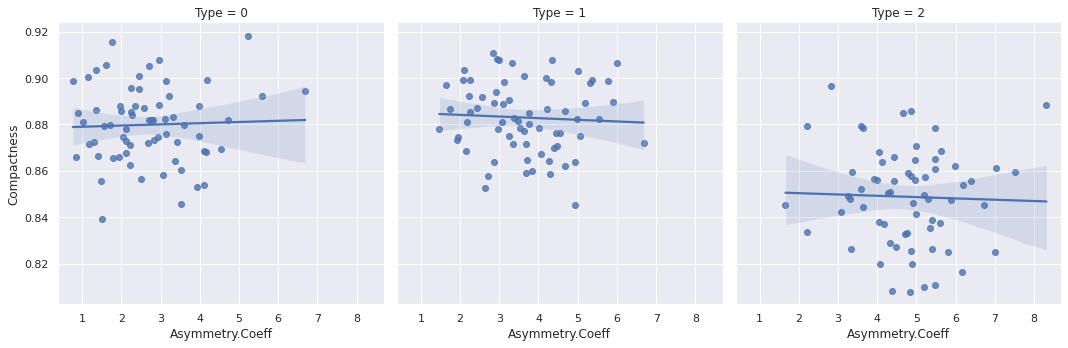

In [17]:
sns.lmplot(x="Asymmetry.Coeff",y="Compactness",data=df_seeds,col="Type")

The plot above shows that Kama and Rosa have similar compactness and asymmetric coefficients, particularly in terms of distribution.

Asymmetric coefficient tends to decrease as area rises for Kama and Rosa types, but somewhat increases for Canadian.

### c. Feature engineering
We must remove category features because we will be using Kmeans clustering. KMeans operate on euclidian distance distance, hence switching category columns to numeric ones would be ineffective. There are no categorical features in this dataset. Furthermore, we will drop the variety, which is label. We'll use diversity later to test the accuracy of our model.

In [18]:
X = df_seeds.iloc[:, range(6)]

In [19]:
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff
0,15.26,14.84,0.8710,5.763,3.312,2.221
1,14.88,14.57,0.8811,5.554,3.333,1.018
2,14.29,14.09,0.9050,5.291,3.337,2.699
3,13.84,13.94,0.8955,5.324,3.379,2.259
4,16.14,14.99,0.9034,5.658,3.562,1.355


**Data Scaling**- In order to employ any distance-based analytical approaches, we must standardise the scaling of numerical columns in order to compare the relative distances between distinct feature columns. We can use 'minmaxscaler' to make the numerical columns also fall between 0 and 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.index = df_seeds.index

We can see that all of our numerical columns now have a min of 0 and a max of 1.

In [21]:
X_scaled.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.408758,0.451618,0.569061,0.419004,0.452981,0.388630
std,0.275730,0.270753,0.211615,0.249771,0.269652,0.194851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164306,0.219008,0.444646,0.207207,0.231290,0.239063
50%,0.362606,0.404959,0.592559,0.361486,0.438346,0.379594
75%,0.648253,0.701446,0.714156,0.621059,0.666073,0.534298
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Data modelling
### a. Dimensionality reduction

To minimise the dimensionality of our data, we will use principal component analysis (PCA). The data matrix is decomposed into orthogonal features using this method. The orthogonal features that result are linear combinations of the original feature set. Consider this strategy as taking a large number of features and combining comparable or redundant elements to build a new, smaller feature set.

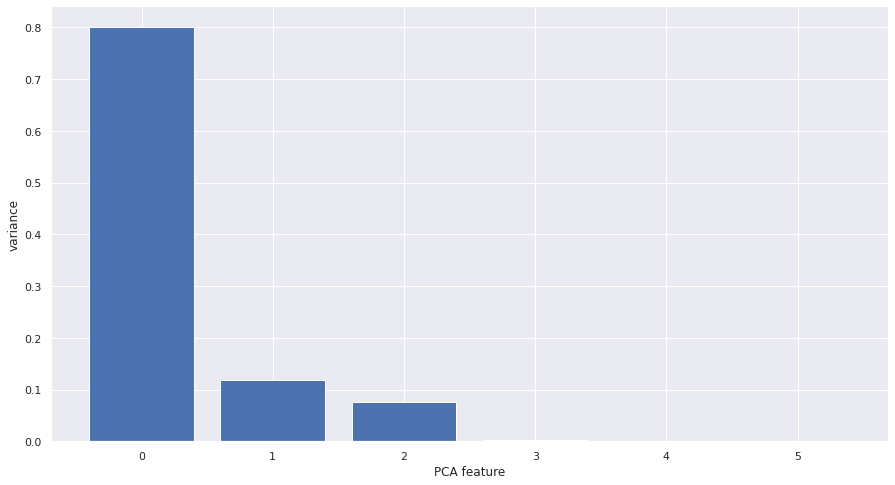

In [22]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create a PCA instance: pca
pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(X_scaled)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [23]:
print(pca.explained_variance_ratio_) # the percentage of the variance

[8.00622234e-01 1.18320024e-01 7.64355965e-02 3.37461673e-03
 1.06032486e-03 1.87203592e-04]


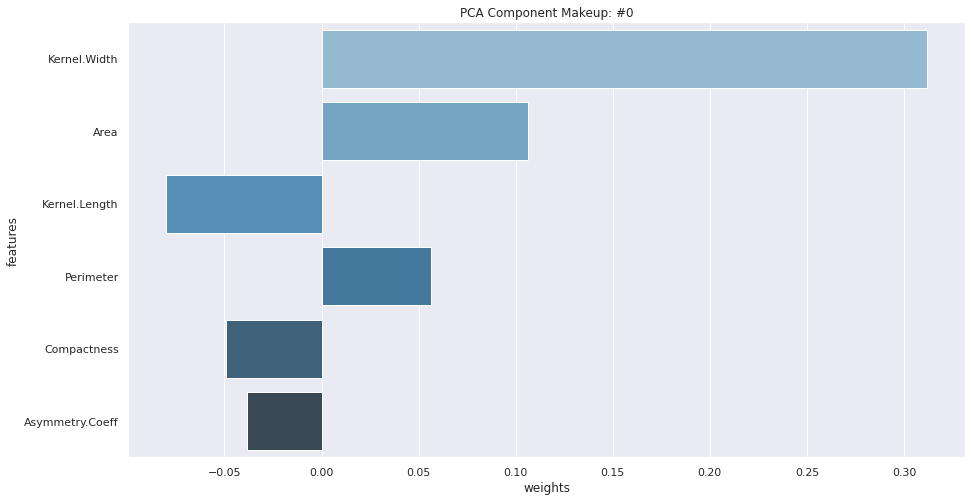

In [24]:
component_number = 0

first_comp = pca_features[:,0]
comps = pd.DataFrame(
    list(zip(first_comp, X_scaled.columns)), columns=["weights", "features"]
)
comps["abs_weights"] = comps["weights"].apply(lambda x: np.abs(x))
ax = sns.barplot(
    data=comps.sort_values("abs_weights", ascending=False).head(10),
    x="weights",
    y="features",
    palette="Blues_d",
)
ax.set_title("PCA Component Makeup: #" + str(component_number))
plt.show()

We can now evaluate the composition of each PCA component based on the weightings of the original characteristics that are included in the component. The above code, for example, demonstrates the first component. This component depicts a wheat kernel with a high kernel width, area, and perimeter but a low kernel length, compactness, and assymetry coefficient.

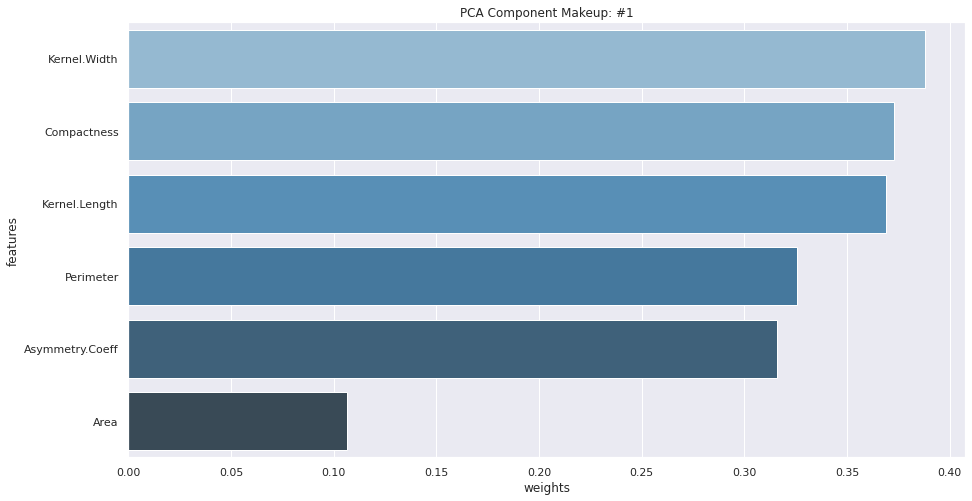

In [25]:
component_number = 1

first_comp = pca_features[:,1]
comps = pd.DataFrame(
    list(zip(first_comp, X_scaled.columns)), columns=["weights", "features"]
)
comps["abs_weights"] = comps["weights"].apply(lambda x: np.abs(x))
ax = sns.barplot(
    data=comps.sort_values("abs_weights", ascending=False).head(10),
    x="weights",
    y="features",
    palette="Blues_d",
)
ax.set_title("PCA Component Makeup: #" + str(component_number))
plt.show()

We can see that this component describes an attribute of a wheat kernel that has low high kerel_width, area, perimeter, low kernel_length, compactness, and asymmetry_coefficient.

Now we may compute the variance explained by the greatest n components that we want to retain. Let's use the top five components as an example.

We can observe that the top two components account for 85 percent of the overall variance in our dataset:

In [26]:
# Create a PCA instance: pca
pca = PCA(n_components=2)

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca.fit_transform(X_scaled)

In [27]:
PCA_list = ["comp_1", "comp_2"]


### b. Mapping N-d to 2-D

We will be using T-SNE to map N-d dimension to 2-D.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


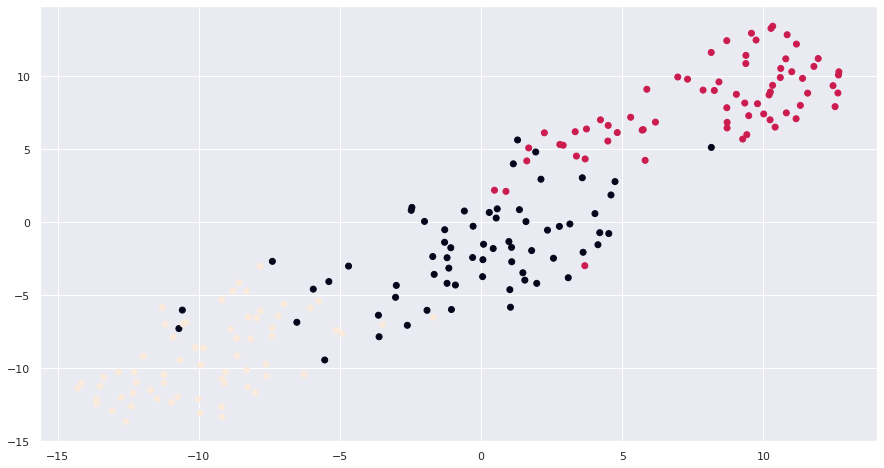

In [28]:
# Use T Stochastic Neighbouring Embedded approach to plot the features in lower dimensions
# Import TSNE
from sklearn.manifold import TSNE 

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.close()
plt.scatter(xs,ys,c=df_seeds['Type'])
plt.show()

### C. Wheat variety segmentation using unsupervised clustering

We'll now use the 'KMeans' algorithm to segment wheat kinds based on the two 'PCA' attributes we created. 'KMeans' is a clustering technique that uses attributes to identify groupings of comparable counties.

In [29]:
train_data = pd.DataFrame(data=pca_features,
             index=df_seeds.Type,             
             columns=PCA_list)  # 1st row as the column names

In [30]:
train_data.head()

,comp_1,comp_2
Type,,
0,0.106108,0.106240
0,0.056234,0.325375
0,-0.049315,0.372636
0,-0.079940,0.368987
0,0.311995,0.388128


As with our PCA model, we begin by naming and defining the hyperparameters of our KMeans model. The KMeans technique lets the user define the number of clusters to identify. Using the elbow-inertia approach, we will determine the optimal number of clusters.

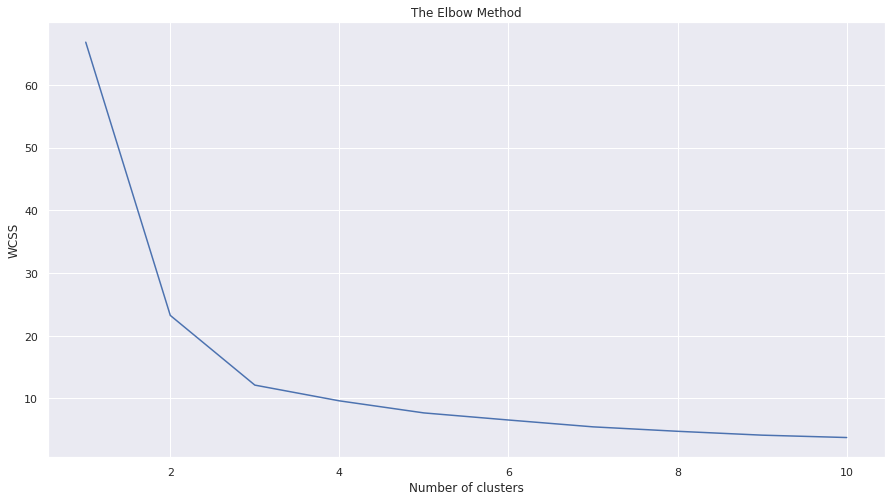

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly notice that ideal number of clusters is 3.

#### Training the K-Means model on the dataset

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_features)

In [48]:
kmeans

KMeans(n_clusters=3, random_state=42)

#### Visualising the clusters

In [49]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

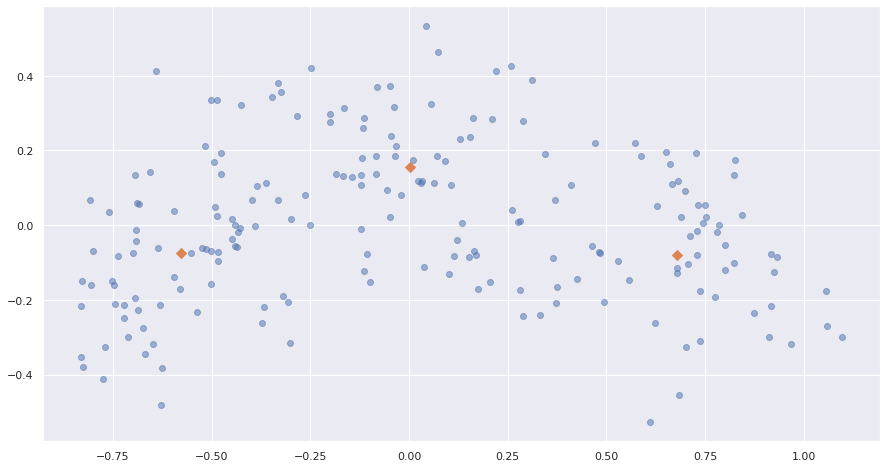

In [33]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = pca_features[:,0]
ys = pca_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)

plt.show()


In [34]:
# Create a result DataFrame with labels and customer as columns: df_seeds
ct = pd.DataFrame({'wheat_type': train_data.index, 'cluster_labels': y_kmeans})
df_seeds['labels'] = y_kmeans

We can see the breakdown of cluster counts and the distribution of clusters.

In [35]:
# Create crosstab: ct
ct = pd.crosstab(df_seeds['Type'],df_seeds['labels'])

In [36]:
# Display ct
print(ct)

labels   0   1   2
Type              
0        2   9  55
1       59   0   9
2        0  63   2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


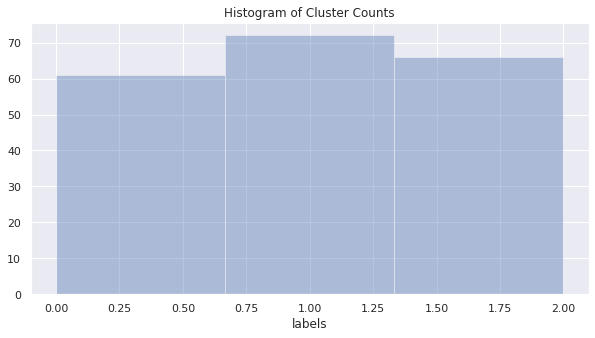

In [40]:
ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(df_seeds['labels'], kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

## Step 4: Drawing conclusions from our modelling

We may make a heatmap depicting the locations of the centroids in the changed feature space. This provides the characteristics that distinguish each cluster. Unsupervised learning results are usually difficult to interpret. This is one approach of integrating the results of PCA with clustering techniques. Because we were able to analyze the makeup of each PCA component, we can understand what each centroid signifies in terms of the 'PCA' components that we interpreted earlier.

Explanation of modelling results is a critical step in putting our research to use.
We may make precise inferences based on the data by integrating `PCA` and `KMeans,` as well as the information included in the model features inside the trained model.

We may create a heatmap showing the centroids' positions in the modified feature space. This reveals the features define each cluster. The results of unsupervised learning are frequently difficult to comprehend. This is one method of combining the findings of PCA and clustering algorithms. We can comprehend what each centroid means in terms of the 'PCA' components that we interpreted previously because we were able to evaluate the makeup of each PCA component.

For example, we can observe that cluster 0 has an average value in principle component-0 and a low value in principal component-1, indicating that it is balanced. Similarly, cluster 1 has high values in principle component-0 and average values in principal component-1, indicating that this kind should have a large area and perimeter. Cluster-2 has the smallest primary component-0, implying that this kind should have a small area, perimeter, length, and so on.

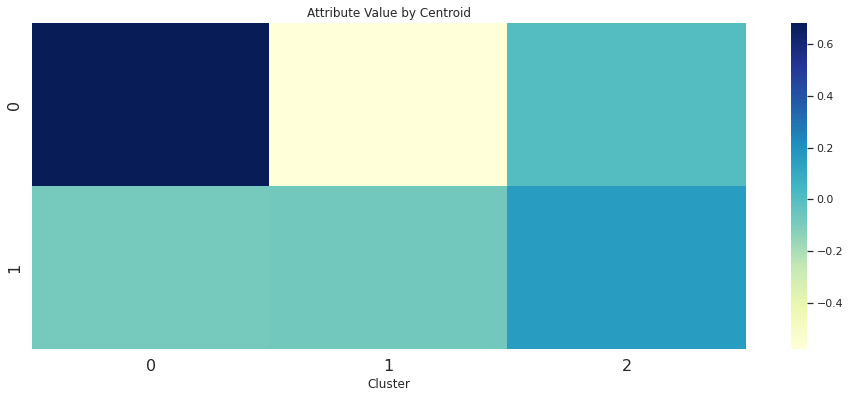

In [41]:
cluster_centroids = kmeans.cluster_centers_
plt.figure(figsize=(16, 6))
ax = sns.heatmap(cluster_centroids.T, cmap="YlGnBu")
ax.set_xlabel("Cluster")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_title("Attribute Value by Centroid")
plt.show()

**MODEL TRAINING USING SUPPORT VECTOR CLASSIFIER**

In [50]:
x = df_seeds.drop('Type', axis=1)

In [51]:
y = df_seeds['Type']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [56]:
y_prediction= model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_prediction)))

Model accuracy : 0.8500


In [63]:
import pickle   #Pickle File creation

In [62]:
outfile= open('seedmodel.pkl', 'wb')
pickle.dump(model, outfile)
outfile.close()